# CUSTOMER CHURN PREDICTION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
print(os.listdir())

['.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ngrok2', '.thumbnails', '.vscode', '.wdm', 'anaconda3', 'AppData', 'application csv', 'Application Data', 'application_data', 'app_data', 'archive (5)', 'augmented data', 'Autodesk', 'Brain Tumor Detection hackathon-Copy1.ipynb', 'Brain Tumor Detection hackathon.ipynb', 'brain tumor.ipynb', 'brain-tumor-detection.ipynb', 'Contacts', 'Cookies', 'Credit_EDA.ipynb', 'CUSTOMER CHURN.ipynb', 'customer_churn', 'customer_churn_prediction', 'cus_churn', 'dataset', 'Desktop', 'Documents', 'Downloads', 'env', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'logs', 'models', 'Music', 'My Documents', 'netflix dataset', 'netflix stock price prediction.ipynb', 'NetHood', 'no', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{38d841d3-ab07-11ed-8b14-dd5b7203b1f3}.TM.blf', 'NTUSER.DAT{38d841d3-ab07-11ed-8b14-dd

### Data Preprocessing

In [3]:
df = pd.read_csv("cus_churn", sep='\t')

In [4]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
df=df.drop(['Name'],axis=1)

In [6]:
df

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,Male,Houston,23,55.13,226,1
99996,99997,62,Female,New York,19,61.65,351,0
99997,99998,64,Male,Chicago,17,96.11,251,1
99998,99999,51,Female,New York,20,49.25,434,1


In [7]:
df.shape

(100000, 8)

In [8]:
df.size

800000

In [9]:
df.dtypes

CustomerID                      int64
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [10]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [11]:
df.info

<bound method DataFrame.info of        CustomerID  Age  Gender     Location  Subscription_Length_Months  \
0               1   63    Male  Los Angeles                          17   
1               2   62  Female     New York                           1   
2               3   24  Female  Los Angeles                           5   
3               4   36  Female        Miami                           3   
4               5   46  Female        Miami                          19   
...           ...  ...     ...          ...                         ...   
99995       99996   33    Male      Houston                          23   
99996       99997   62  Female     New York                          19   
99997       99998   64    Male      Chicago                          17   
99998       99999   51  Female     New York                          20   
99999      100000   27  Female  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  Churn  
0             73.36   

In [12]:
df.isnull().sum()

CustomerID                    0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

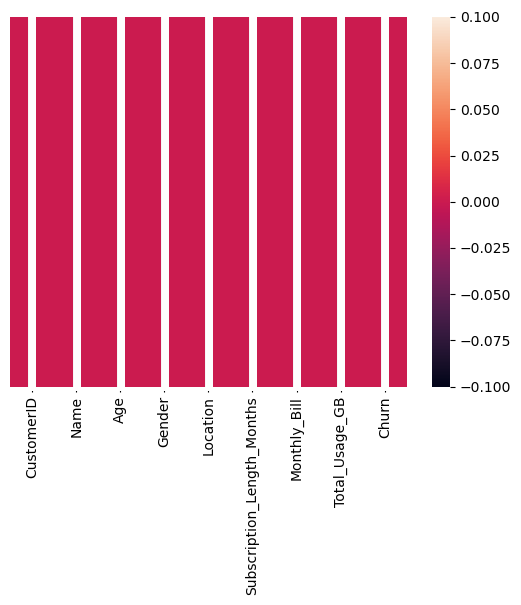

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

In [13]:
df.duplicated().sum()

0

In [14]:
x=df[['CustomerID','Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']].values

In [15]:
x

array([[1, 63, 'Male', ..., 73.36, 236, 0],
       [2, 62, 'Female', ..., 48.76, 172, 0],
       [3, 24, 'Female', ..., 85.47, 460, 0],
       ...,
       [99998, 64, 'Male', ..., 96.11, 251, 1],
       [99999, 51, 'Female', ..., 49.25, 434, 1],
       [100000, 27, 'Female', ..., 76.57, 173, 1]], dtype=object)

In [16]:
y=df[['Churn']].values

In [17]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encode_x=LabelEncoder()

In [20]:
x[:,2]=label_encode_x.fit_transform(x[:,2])

In [21]:
x

array([[1, 63, 1, ..., 73.36, 236, 0],
       [2, 62, 0, ..., 48.76, 172, 0],
       [3, 24, 0, ..., 85.47, 460, 0],
       ...,
       [99998, 64, 1, ..., 96.11, 251, 1],
       [99999, 51, 0, ..., 49.25, 434, 1],
       [100000, 27, 0, ..., 76.57, 173, 1]], dtype=object)

In [22]:
label_encode_x=LabelEncoder()

In [23]:
x[:,3]=label_encode_x.fit_transform(x[:,3])

In [24]:
x

array([[1, 63, 1, ..., 73.36, 236, 0],
       [2, 62, 0, ..., 48.76, 172, 0],
       [3, 24, 0, ..., 85.47, 460, 0],
       ...,
       [99998, 64, 1, ..., 96.11, 251, 1],
       [99999, 51, 0, ..., 49.25, 434, 1],
       [100000, 27, 0, ..., 76.57, 173, 1]], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
onehotencoder= OneHotEncoder()

In [27]:
onehotencoder.fit_transform(df.Gender.values.reshape(-1,1)).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [28]:
onehotencoder.fit_transform(df.Location.values.reshape(-1,1)).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [29]:
labelencoder_y= LabelEncoder()

In [30]:
y = labelencoder_y.fit_transform(y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
df["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [33]:
churn = df.loc[df["Churn"]==1]

In [34]:
not_churn = df.loc[df["Churn"]==0]

In [35]:
not_churn["Location"].value_counts().sort_values()

New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64

In [36]:
churn["Location"].value_counts().sort_values()

Los Angeles     9880
Houston         9899
Chicago         9945
New York        9979
Miami          10076
Name: Location, dtype: int64

In [37]:
not_churn["Gender"].value_counts().sort_values()

Male      24949
Female    25272
Name: Gender, dtype: int64

In [38]:
churn["Gender"].value_counts().sort_values()

Male      24835
Female    24944
Name: Gender, dtype: int64

In [39]:
not_churn["Subscription_Length_Months"].value_counts().sort_values()

24    2030
19    2034
23    2035
17    2043
13    2047
3     2050
8     2066
12    2070
10    2074
4     2080
7     2096
9     2097
18    2099
16    2100
11    2108
1     2109
15    2113
21    2116
2     2119
22    2128
14    2140
6     2144
5     2155
20    2168
Name: Subscription_Length_Months, dtype: int64

In [40]:
churn["Subscription_Length_Months"].value_counts().sort_values()

15    2009
5     2016
4     2018
17    2021
9     2037
21    2038
6     2040
8     2040
23    2048
18    2072
19    2072
14    2073
10    2077
24    2083
12    2085
3     2086
11    2092
13    2107
2     2109
7     2115
16    2129
20    2135
1     2138
22    2139
Name: Subscription_Length_Months, dtype: int64

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from matplotlib import pyplot

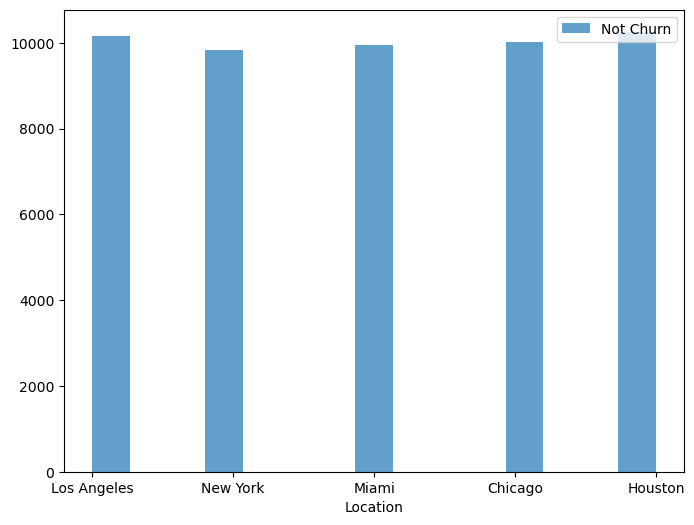

In [43]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Location')
pyplot.hist(not_churn["Location"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

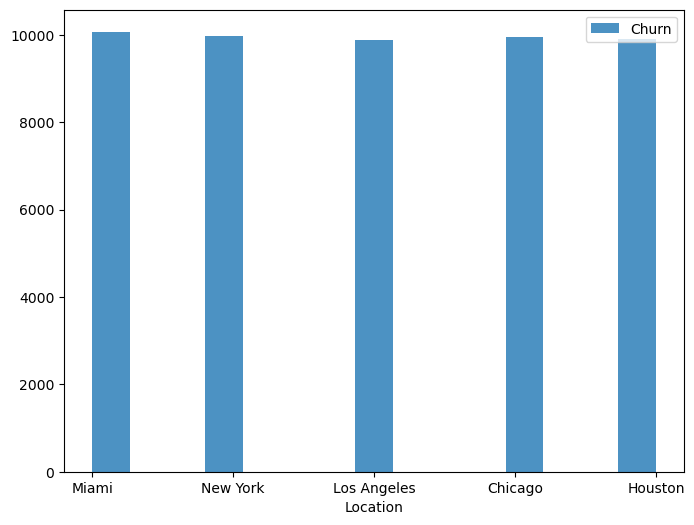

In [44]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Location')
pyplot.hist(churn["Location"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

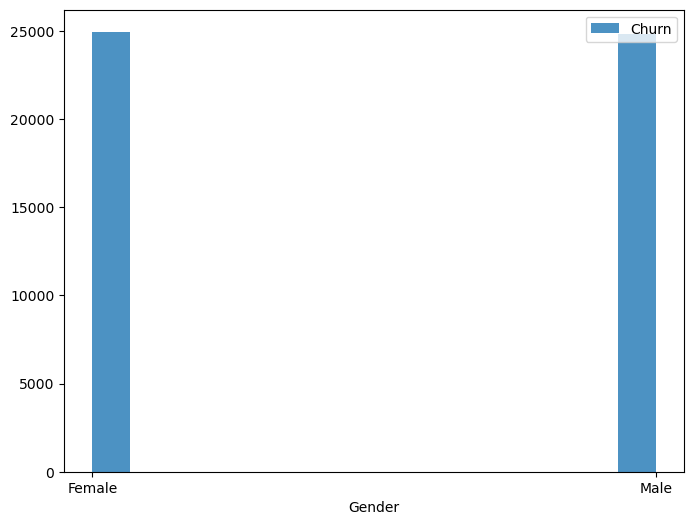

In [45]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Gender')
pyplot.hist(churn["Gender"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

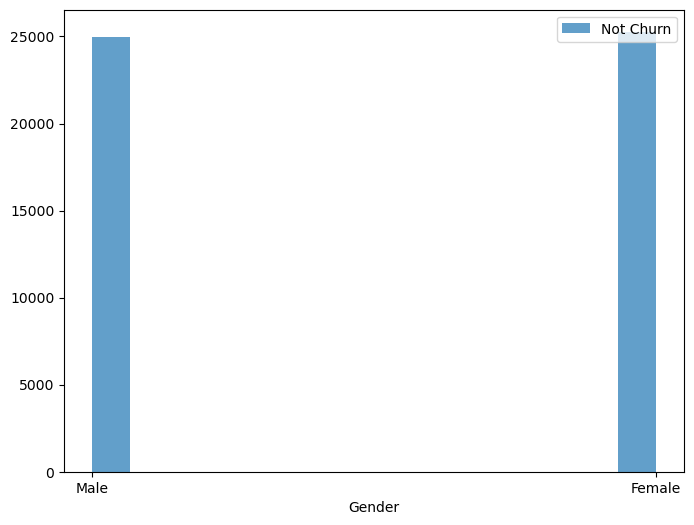

In [46]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Gender')
pyplot.hist(not_churn["Gender"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

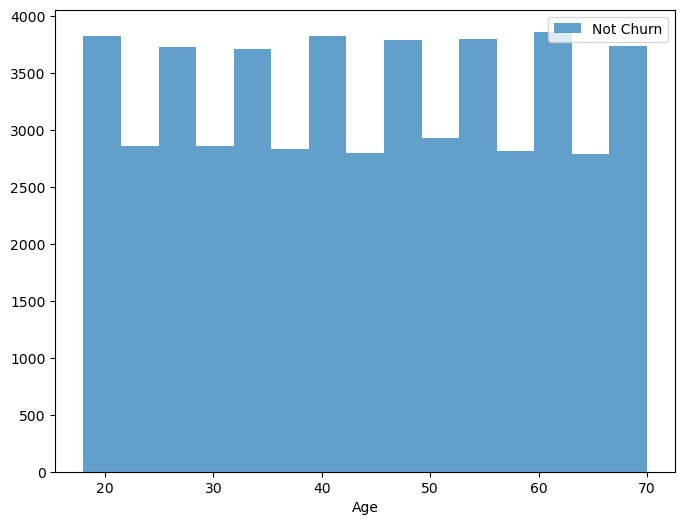

In [47]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

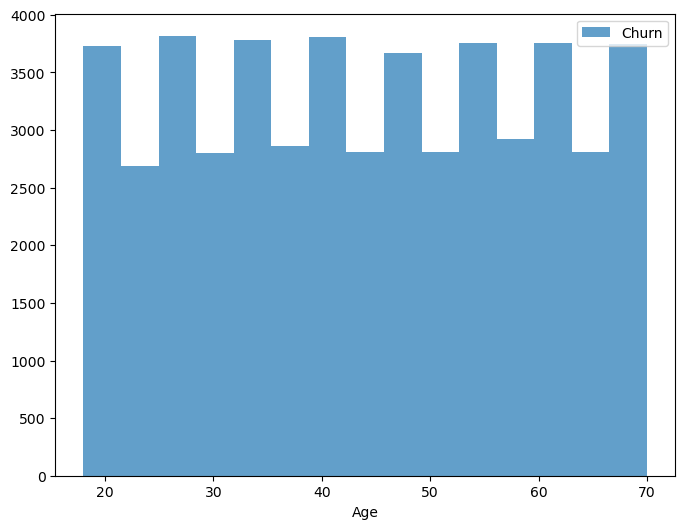

In [48]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

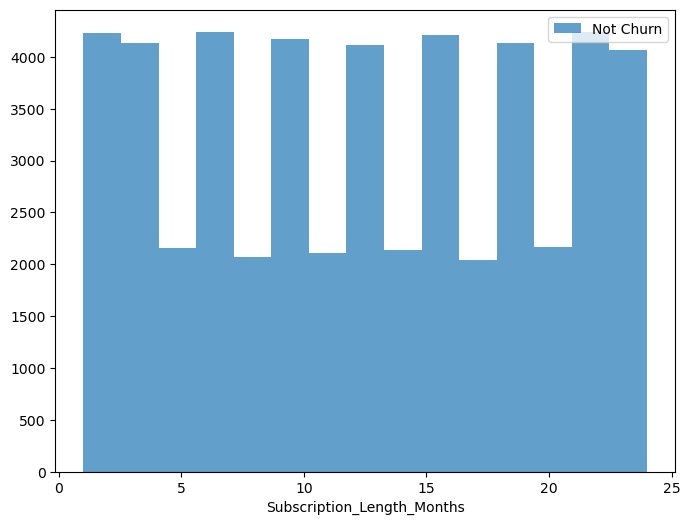

In [49]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Subscription_Length_Months')
pyplot.hist(not_churn["Subscription_Length_Months"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

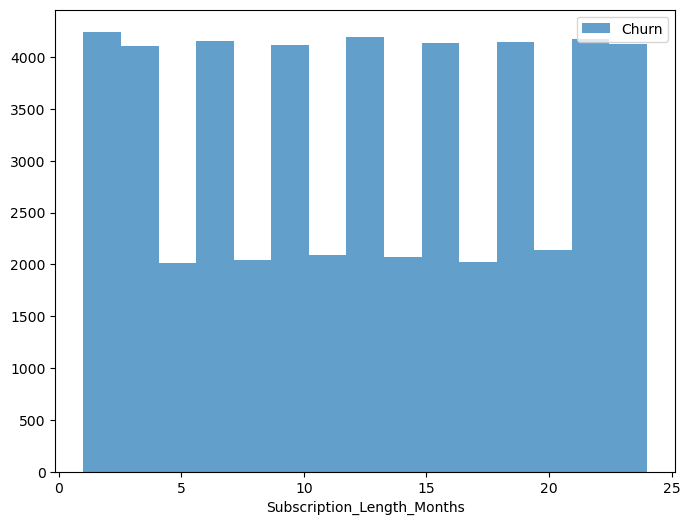

In [50]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Subscription_Length_Months')
pyplot.hist(churn["Subscription_Length_Months"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

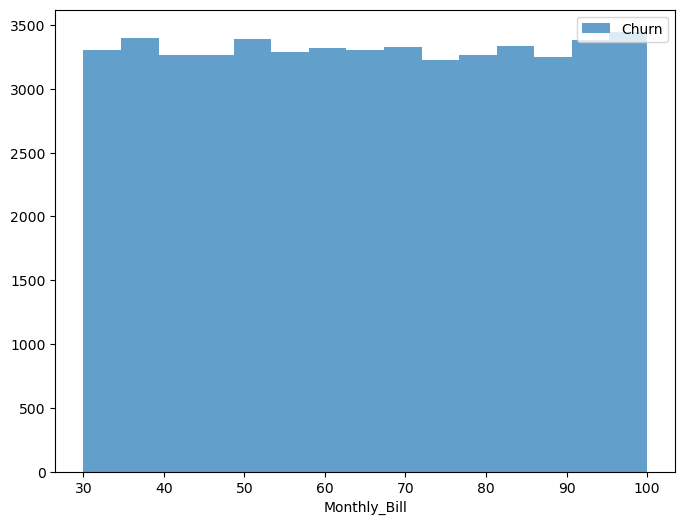

In [51]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(churn["Monthly_Bill"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

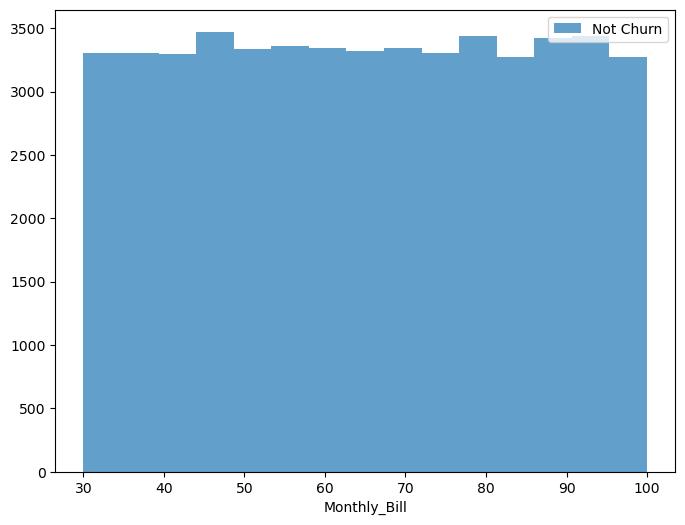

In [52]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(not_churn["Monthly_Bill"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

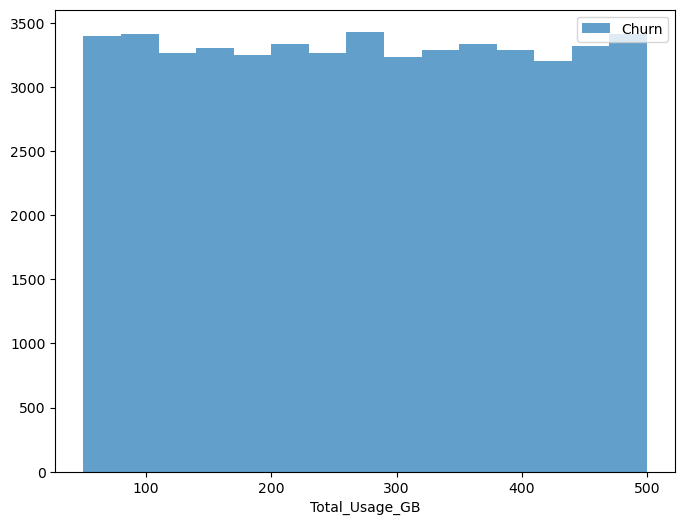

In [53]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total_Usage_GB')
pyplot.hist(churn["Total_Usage_GB"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

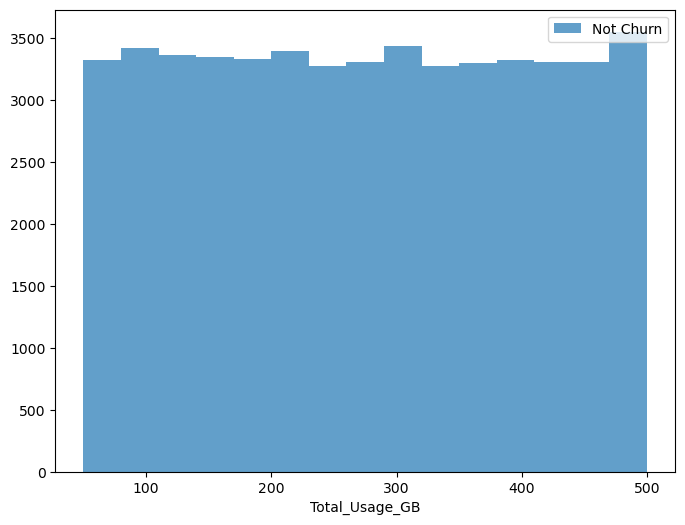

In [54]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total_Usage_GB')
pyplot.hist(not_churn["Total_Usage_GB"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

### Training & testing data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [57]:
x_train

array([[10383, 43, 0, ..., 81.28, 160, 0],
       [73172, 37, 0, ..., 51.28, 422, 1],
       [30939, 33, 0, ..., 84.88, 214, 1],
       ...,
       [42614, 59, 0, ..., 60.77, 85, 0],
       [43568, 53, 1, ..., 37.6, 329, 0],
       [68269, 50, 1, ..., 34.58, 321, 1]], dtype=object)

In [58]:
x_test

array([[3583, 49, 0, ..., 52.41, 204, 0],
       [60499, 69, 0, ..., 32.97, 307, 1],
       [53228, 61, 0, ..., 62.7, 311, 0],
       ...,
       [43764, 26, 0, ..., 39.94, 239, 1],
       [71346, 33, 1, ..., 57.09, 259, 1],
       [77688, 44, 1, ..., 37.62, 380, 1]], dtype=object)

In [59]:
y_train

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
y_test

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Feature Extraction

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


In [62]:
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456))]
          
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.551350 (0.149608)
KNN: 0.501200 (0.005501)
CART: 1.000000 (0.000000)
RF: 1.000000 (0.000000)


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc_x=StandardScaler()

In [65]:
x_train= sc_x.fit_transform(x_train)

In [66]:
x_test=sc_x.transform(x_test)

In [67]:
x_train

array([[-1.37214694, -0.06505099, -0.99638155, ...,  0.80146548,
        -0.87421753, -0.99675526],
       [ 0.80265557, -0.45772275, -0.99638155, ..., -0.68072045,
         1.13183376,  1.0032553 ],
       [-0.66015534, -0.71950393, -0.99638155, ...,  0.97932779,
        -0.46075658,  1.0032553 ],
       ...,
       [-0.2557721 ,  0.98207372, -0.99638155, ..., -0.21185563,
        -1.44846886, -0.99675526],
       [-0.22272871,  0.58940195,  1.00363159, ..., -1.35659723,
         0.41976212, -0.99675526],
       [ 0.63283193,  0.39306607,  1.00363159, ..., -1.50580395,
         0.35850864,  1.0032553 ]])

In [68]:
x_test

array([[-1.60767637e+00,  3.27620778e-01, -9.96381547e-01, ...,
        -6.24891446e-01, -5.37323423e-01, -9.96755264e-01],
       [ 3.63704924e-01,  1.63652666e+00, -9.96381547e-01, ...,
        -1.58534793e+00,  2.51315063e-01,  1.00325530e+00],
       [ 1.11861622e-01,  1.11296431e+00, -9.96381547e-01, ...,
        -1.16501673e-01,  2.81941800e-01, -9.96755264e-01],
       ...,
       [-2.15939919e-01, -1.17762099e+00, -9.96381547e-01, ...,
        -1.24098673e+00, -2.69339472e-01,  1.00325530e+00],
       [ 7.39408994e-01, -7.19503927e-01,  1.00363159e+00, ...,
        -3.93670441e-01, -1.16205785e-01,  1.00325530e+00],
       [ 9.59074820e-01,  3.94307897e-04,  1.00363159e+00, ...,
        -1.35560911e+00,  8.10253019e-01,  1.00325530e+00]])

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
randomforest=RandomForestClassifier()

In [71]:
randomforest.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1)

In [73]:
y_pred1=randomforest.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_pred1)

1.0

In [76]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [77]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10091
           1       1.00      1.00      1.00      9909

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [78]:
cm = confusion_matrix(y_test, y_pred1)

In [79]:
cm

array([[10091,     0],
       [    0,  9909]], dtype=int64)

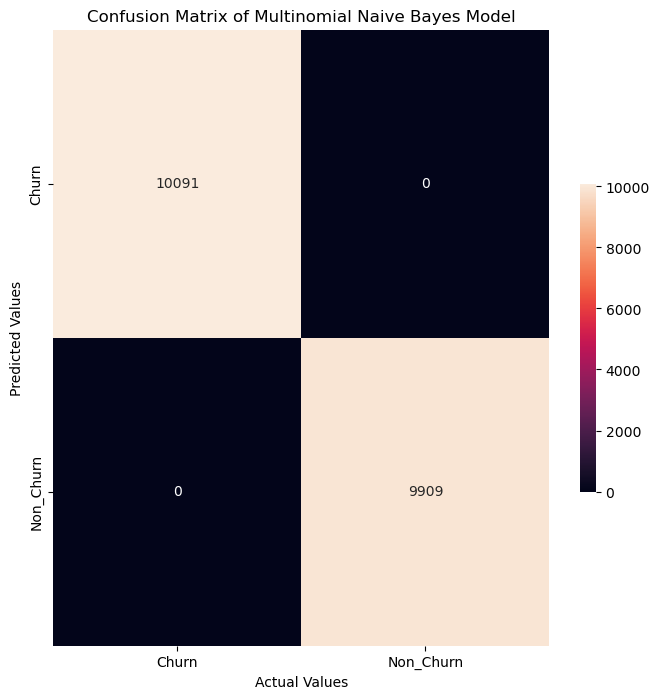

In [80]:
plt.figure(figsize=(8,8))
axis_labels=['Churn', 'Non_Churn']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink":0.5})
p=plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  

In [82]:
import sklearn

x = sklearn.preprocessing.StandardScaler().fit_transform(x)

In [83]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assume X is a three-dimensional array
X = np.random.rand(100, 10, 5)

# Reshape X to a two-dimensional array
X_2d = X.reshape(X.shape[0], -1)

# Assume y is a one-dimensional array
y = np.random.randint(0, 2, (100,))

# Create a Logistic Regression model and fit it to the data
model = LogisticRegression()
model.fit(X_2d, y)

LogisticRegression()

In [84]:
x_train = np.array(x[:int(x.shape[0]*0.8)])
x_test = np.array(x[int(x.shape[0]*0.8):])

In [85]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0]) 
        y.append(df[i, 0]) 
    x = np.array(x) 
    y = np.array(y)
    return x,y

In [87]:
x_train, y_train = create_dataset(x_train)
x_test, y_test = create_dataset(x_test)

In [88]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [89]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

In [90]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1)) 

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [92]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

In [93]:
model.compile(loss='mean_squared_error', optimizer='adam') 

In [94]:
epochs = 40
batch_size = 64 
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
model.save('customer_churn_prediction')

Epoch 1/40
1250/1250 [==============================] - 204s 159ms/step - loss: 0.0021
Epoch 2/40
1250/1250 [==============================] - 305s 244ms/step - loss: 8.6226e-04
Epoch 3/40
1250/1250 [==============================] - 273s 219ms/step - loss: 6.4684e-04
Epoch 4/40
1250/1250 [==============================] - 253s 203ms/step - loss: 5.0600e-04
Epoch 5/40
1250/1250 [==============================] - 243s 195ms/step - loss: 4.2012e-04
Epoch 6/40
1250/1250 [==============================] - 239s 192ms/step - loss: 3.8832e-04
Epoch 7/40
1250/1250 [==============================] - 241s 193ms/step - loss: 3.5332e-04
Epoch 8/40
1250/1250 [==============================] - 238s 191ms/step - loss: 3.4976e-04
Epoch 9/40
1250/1250 [==============================] - 237s 190ms/step - loss: 3.4666e-04
Epoch 10/40
1250/1250 [==============================] - 239s 191ms/step - loss: 3.3374e-04
Epoch 11/40
1250/1250 [==============================] - 242s 193ms/step - loss: 3.1863e-04
E

INFO:tensorflow:Assets written to: customer_churn_prediction\assets


In [95]:
model = load_model('customer_churn_prediction')

In [99]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)) 

624/624 [==============================] - 21s 34ms/step


ValueError: non-broadcastable output operand with shape (19950,1) doesn't match the broadcast shape (19950,8)

NameError: name 'y_test_scaled' is not defined

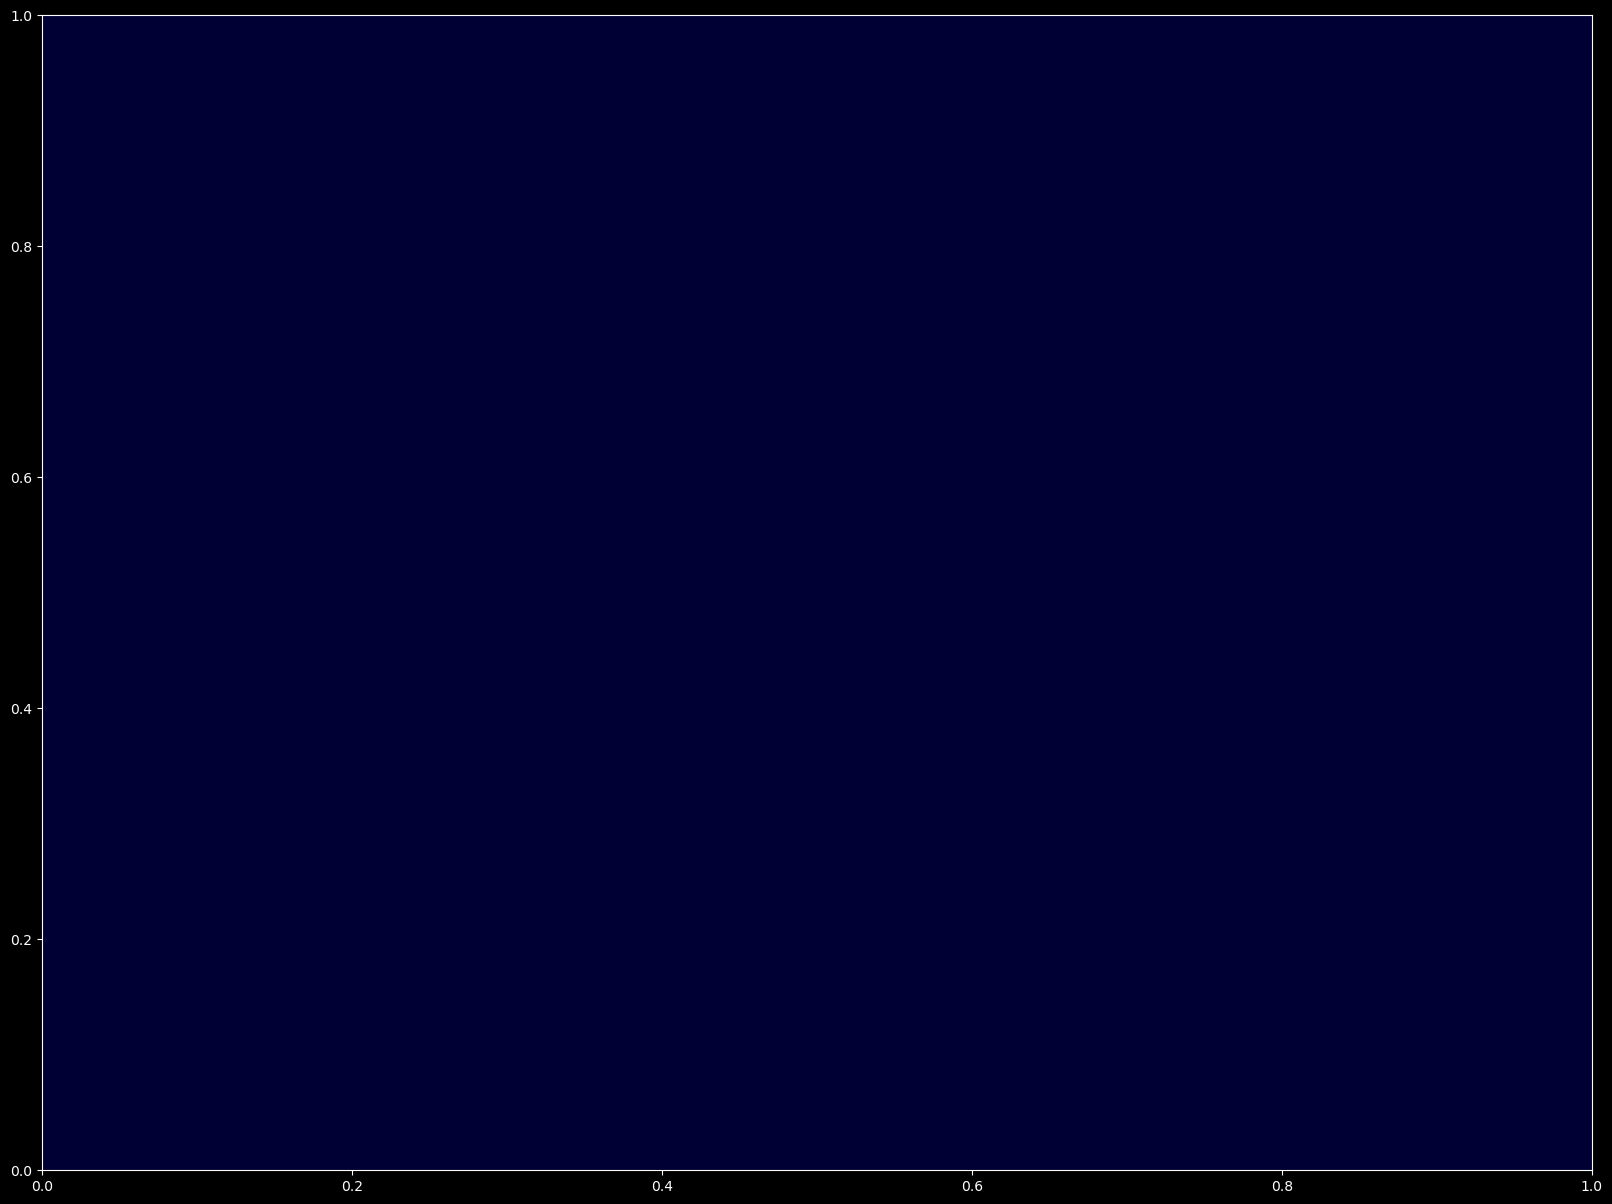

In [100]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20,15))
ax.set_facecolor('#000035')
ax.plot(y_test_scaled, color='fuchsia', linewidth=2, label='Churn')
plt.plot(predictions, color='greenyellow', linewidth=2.5, label='Non_Churn')
plt.title('Customer Churn Prediction')
plt.legend(); 
